# Regressão Linear (explicação rápida)

A regressão linear é um modelo estatístico que estima a relação entre uma variável dependente contínua 𝑦 y e uma ou mais variáveis independentes 𝑋, assumindo uma relação linear:


In [1]:
# !pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("willianoliveiragibin/healthcare-insurance")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\andra\.cache\kagglehub\datasets\willianoliveiragibin\healthcare-insurance\versions\1


In [3]:
print(path)

C:\Users\andra\.cache\kagglehub\datasets\willianoliveiragibin\healthcare-insurance\versions\1


In [4]:
import os
import shutil

In [5]:
source_path = path

file_name = os.listdir(source_path)[0]

file_path = os.path.join(source_path, file_name).replace("\\", "/")


target_path = "../dataset/"


if not os.path.exists(target_path):
    print("Criando o caminho para armazenar os dados:")
    os.makedirs(target_path)

shutil.copy(file_path, target_path)

'../dataset/insurance.csv'

In [44]:
!pip install --quiet watermark

In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from math import sqrt
import joblib
import watermark

In [65]:
%reload_ext watermark
%watermark  --iversion -d -a "Breno Filipe de Andrade - Cientista de dados"

Author: Breno Filipe de Andrade - Cientista de dados

Date: 2025-12-16

IPython   : 8.27.0
ipywidgets: 7.8.1
joblib    : 1.4.2
json      : 2.0.9
kagglehub : 0.3.13
markdown  : 3.4.1
matplotlib: 3.9.2
numpy     : 1.26.4
pandas    : 2.2.2
seaborn   : 0.13.2
sklearn   : 1.5.1
sys       : 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
watermark : 2.5.1
xarray    : 2023.6.0



In [7]:
data = pd.read_csv(file_path)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
categorical_variables = ['sex', 'smoker', 'region', 'children']
numerical_variables = [v for v in data.columns if v not in categorical_variables]

In [10]:
for var in categorical_variables:
    print(data[var].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [11]:
data[numerical_variables].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [12]:
cor = data[numerical_variables].corr()

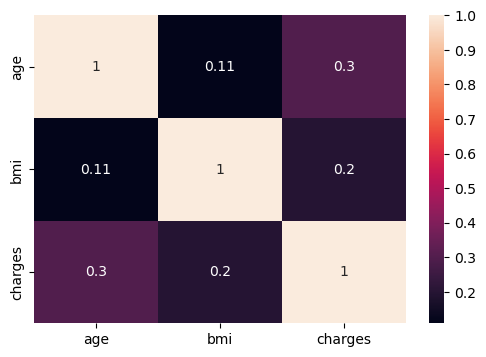

In [13]:
plt.figure(figsize=(6,4))

sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
versao = 'v1'

In [14]:
data['sex'] = np.where(data['sex'] == 'male', 1, 0) # 1 para male ; 0 para female
data['smoker'] = np.where(data['smoker'] == 'yes', 1, 0) # 1 para yes ; 0 para no

In [15]:
remove_variables = ['region', 'children']

data = data.drop(remove_variables, axis=1)

In [23]:
y = data['charges'] # Variavel alvo
X = data.drop(['charges'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

regressor = LinearRegression().fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")


Root Mean squared error: 6427.98
Coefficient of determination: 0.62


In [33]:
intercepto = regressor.intercept_
coeficientes = pd.Series(
    regressor.coef_,
    index=X.columns
)

print("Intercepto:", intercepto)
print("\nCoeficientes:")
print(coeficientes)

Intercepto: -11825.806896124024

Coeficientes:
age         263.231334
sex         -67.881538
bmi         323.477214
smoker    23878.300015
dtype: float64


In [ ]:


joblib.dump(regressor,f"../models/linear_model_{versao}.pkl")